

## CS349 HW1 Group 8



### Task 1

Did you alter the Node data structure? If so, how and why?

Yes, we altered the Node data structure. We added two fields: attribute and is_leaf and introduced a helper method: add_child.

The attribute field stores the feature or decision attribute associated with the node, which helps in decision-making during the tree traversal. The is_leaf field is a boolean that indicates whether the node is a leaf node, which helps when checking when to stop traversing the tree. The add_child function is a helper method that simplifies the provess of adding children nodes to a parent when building the decision tree.

### Task 2

How did you handle missing attributes, and why did you choose this strategy?

To handle missing attributes in the dataset, we used an imputation strategy where missing values (denoted by ?) are replaced by the most common value for the corresponding attribute. We implemented this in our code using the preprocess function, which can operate in different modes: 'remove', 'impute', and 'keep'.

We decided to adopt the imputation strategy. For each attribute with missing values, we calculate the most common value across all examples. We then replace these values with the most common value. We chose this strategy because removing examples with missing attributes can lead to loss of data, which may result in fewer training examples. This method maintains the size of the dataset. By imputing the most common value in the corresponding attribute column, we preserve the distribution and make reasonable assumptions about the missing values and adding in minimum bias to the dataset.

### Task 3

How did you perform pruning, and why did you choose this strategy?

We implemented error complexity pruning, a post-pruning technique that balances model complexity with performance. The method begins by fully constructing the decision tree to its full depth, then pruning the tree by removing branches and evaluating the pruned tree's accuracy on a validation set (independent from training).

After the tree is built, we begin pruning from the leaf nodes. For each internal node, we calculate the error rate for the subtree starting from that node and compare it to the error rate if the node were replaced by a leaf node (the most common class label of the subtree). If pruning the node improves or maintains accuracy on the validation set, we replace the subtree with the single leaf node.

The algorithm generates several pruned versions of the original tree, with varying degrees of simplification. The version of the tree that performs best on the validation set is selected as the final model to ensure the generalization ability of the tree.

We chose this strategy because error complexity pruning helps prevent overfitting by reducing the complexity of the tree while maintaining good performance on unseen data. The method evaluates the pruned versions of the tree on a validation set, which ensures that the chosen tree generalizes well to independent data from the training set. This is crucial for real-world scenarios where we aim to minimize errors on data outside of the training set.

Compared to other strategies, like critical value pruning, error complexity pruning is also more flexible. It allows for the exploration of various tree depths and sizes, finding the version that balances accuracy and simplicity.

### Task 4

In [7]:
import importlib
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import ID3 as decision_tree
import experiment
importlib.reload(experiment)

<module 'experiment' from 'c:\\Users\\erica\\OneDrive - ETH Zurich\\Exchange\\Machine Learning\\CS349---Group8\\HW1\\experiment.py'>

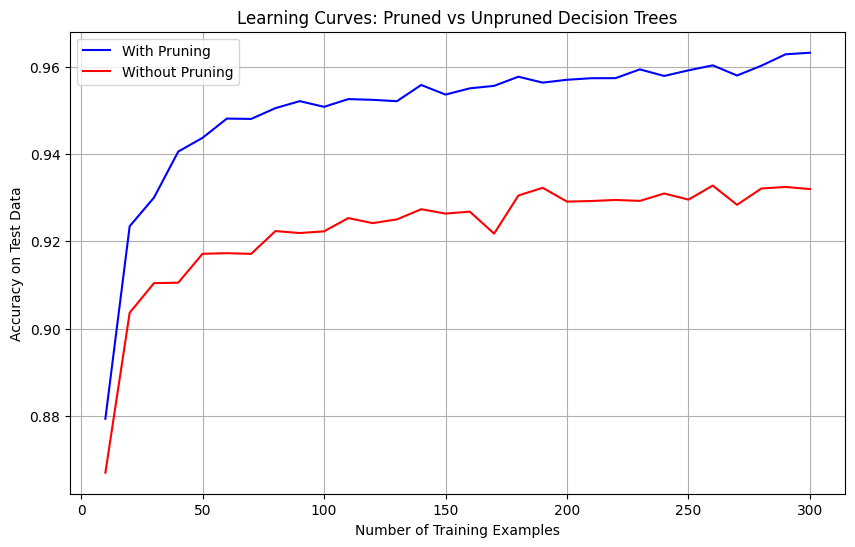

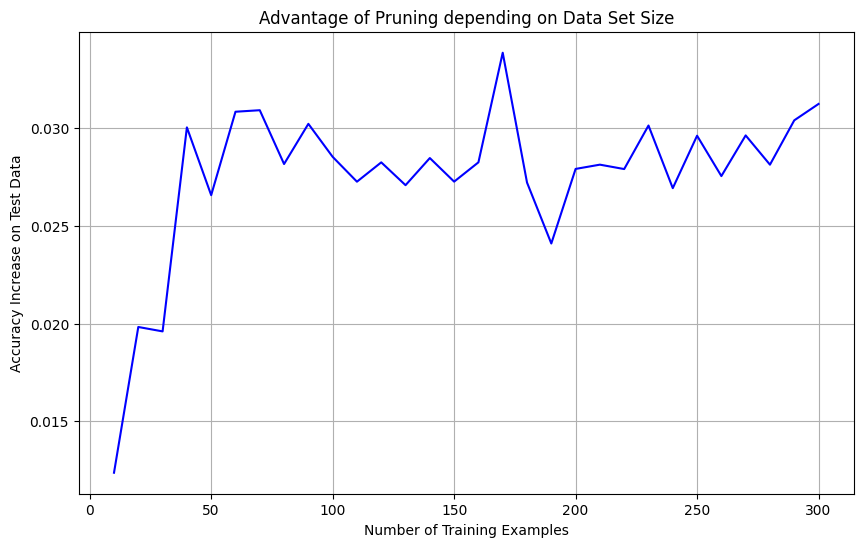

In [8]:
experiment.experiment()

(a) What is the general trend of both lines as training set size increases, and why does this make sense?

Both lines show an increasing trend as the number of training examples increases. The accuracy for both pruned and unpruned decision trees improves with more training data, which is expected since larger training sets provide more information, allowing the decision tree to make better predictions. This makes sense because as the number of training examples increases, the model has more data to learn from, which leads to more accurate generalizations and fewer errors. In addition, the pruned tree outperforms the unpruned tree in terms of accuracy, which makes sense because pruning the tree helps to simplify the model, reduce overfitting, and also reduce errors.



(b) How does the advantage of pruning change as the dataset size increases? Does this make sense, and why or why not?

The advantage is more prominent when the size of the dataset is small. This is shown as the accuracy with pruning for smaller datasets increases more rapidly compared to the unpruned tree. From small dataset sizes, the gap between pruning and not pruning increases until a size of around 50. The increase in accuracy slowly decreases and plateaus for pruning and unpruned as the number of training examples increases, the gap between the trees also stays similar. This makes sense because pruning helps to prevent overfitting which is a bigger risk for smaller datasets, as it is harder to generalize. Yet, as the dataset size increases, both the pruned and unpruned tree have enough data to improve accuracy, so the advantage of pruning diminishes.

### Task 5

If the test accuracy on the training set is less than 100 percent, this is because the training set does not have enough number of features to complete the training of the decision tree.
The pruning the tree resolved the overfitting of the decision tree, this allows the decision tree to be more generalized to classifying unknown datasets. Therefore, the classification accuracy for training set has dropped while the classification accuracy for validation and testing set has increased.

**Outcome:**
```
Accuracy on trainning set before pruning:  1.0
Accuracy on trainning set after pruning:  0.845

Accuracy on validation set before pruning:  0.8
Accuracy on validation set after pruning:  0.8571428571428571

Test accuracy before pruning:  0.6285714285714286
Test accuracy after pruning:  0.8
```

###Task 6